In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

loan_df = pd.read_csv("../Data/Loan_Default.csv")

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [2]:
loan_df["income"] = loan_df["income"].fillna(loan_df["income"].mean())
loan_df["loan_amount"] = loan_df["loan_amount"].fillna(loan_df["loan_amount"].mean())
loan_df["rate_of_interest"] = loan_df["rate_of_interest"].fillna(loan_df["rate_of_interest"].mean())
loan_df["approv_in_adv"] = loan_df["approv_in_adv"].fillna(loan_df["approv_in_adv"].mode())



loan_df = loan_df.assign(
    total_units = loan_df["total_units"].map({
        "1U": "1U",
        "2U": "2U+",
        "3U": "2U+",
        "4U": "2U+"}),
    loan_amt_v_income = loan_df["loan_amount"]/loan_df["income"]
)

loan_df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1,loan_amt_v_income
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0,66.954023
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN,41.465863
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0,42.879747
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0,38.425926
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0,66.714559


In [3]:
prep_loan_df = loan_df.drop([
    "year", 
     "ID", 
     "open_credit", 
    "construction_type", 
    "Security_Type", 
    "Secured_by"], 
    axis=1
)

prep_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   business_or_commercial     148670 non-null  object 
 7   loan_amount                148670 non-null  int64  
 8   rate_of_interest           148670 non-null  float64
 9   Interest_rate_spread       112031 non-null  float64
 10  Upfront_charges            109028 non-null  float64
 11  term                       148629 non-null  float64
 12  Neg_ammortization          148549 non-null  object 
 13  interest_only              14

In [4]:
from sklearn.model_selection import train_test_split

features = [
    "loan_amount", 
    "income", 
    "Gender",
    "rate_of_interest",
    "age",
    "lump_sum_payment",
    "credit_type",
    "total_units",
    "Credit_Worthiness",
    "Credit_Score",
    "approv_in_adv", 

]

X = pd.get_dummies(prep_loan_df[features], drop_first=True)
y = prep_loan_df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12345)

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
lr.coef_

array([[ 8.95066834e-07, -5.87077394e-05, -1.10939898e-03,
        -2.83865196e-04, -5.31378056e-01,  1.55712196e-01,
         3.69404337e-01, -2.02119273e-01,  1.95201381e-02,
         1.08722283e-01,  7.72133514e-02,  1.60673375e-02,
         9.64237593e-02, -7.25422578e-01, -1.04604044e+00,
         3.87024594e+00, -1.02395353e+00,  1.00889599e-01,
         1.87612179e-01, -2.93478327e-01]])

In [7]:
lr.intercept_

array([-0.06357392])

In [8]:
lr.score(X_train, y_train)

0.8568726037532791

In [9]:
lr.score(X_test, y_test)

0.8570323535346741

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test))

array([[22338,     7],
       [ 4244,  3145]], dtype=int64)

## Tuning Regularization

In [11]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [12]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "C": np.linspace(.1, 2, 20),
    "penalty": ["l1", "l2", "elasticnet"],
    "l1_ratio": np.linspace(0, 1, 11)
}

gridsearch = GridSearchCV(LogisticRegression(solver="saga"), parameters) # max_iter

gridsearch.fit(X_train_std, y_train)

gridsearch.best_params_

c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

{'C': 0.2, 'l1_ratio': 0.4, 'penalty': 'elasticnet'}

In [13]:

parameters = {
    "C": np.linspace(.1, 2, 20),
    "penalty": ["l1", "l2"]
}

gridsearch = GridSearchCV(LogisticRegression(solver="saga", max_iter=1000), parameters) # max_iter

gridsearch.fit(X_train_std, y_train)

gridsearch.best_params_

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.2,l1_ratio= 0.4, penalty='elasticnet', solver="saga", max_iter=1000) 

lr = logreg.fit(X_train_std, y_train)

print(f"Train Accuracy: {lr.score(X_train_std, y_train)}")
print(f"Test Accuracy: {lr.score(X_test_std, y_test)}")

Train Accuracy: 0.8607570458061479
Test Accuracy: 0.86211071500639


In [17]:
confusion_matrix(y_test, lr.predict(X_test_std))

array([[22206,   139],
       [ 3961,  3428]], dtype=int64)

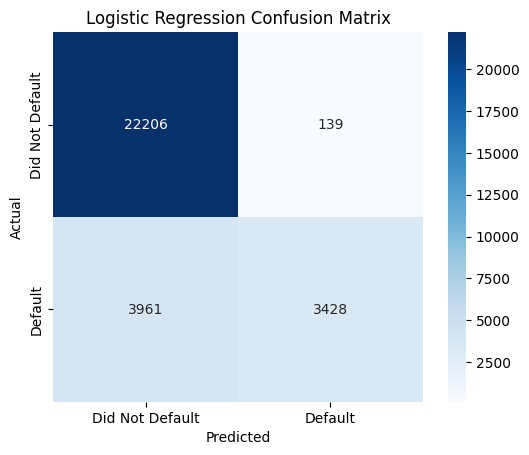

In [16]:
lr_confusion = confusion_matrix(y_test, lr.predict(X_test_std))
sns.heatmap(
    lr_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Did Not Default", "Default"],        
    yticklabels=["Did Not Default", "Default"]
).set(
    xlabel='Predicted',
    ylabel='Actual',
    title='Logistic Regression Confusion Matrix'
);